# 1- Gather Data

In [1]:
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
from functools import reduce
from sqlalchemy import create_engine
import re
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# The WeRateDogs Twitter archive
wrd = pd.read_csv('twitter-archive-enhanced.csv')   

In [3]:
# The tweet image predictions
tw_im = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(tw_im.content)

tw_im = pd.read_csv('image_predictions.tsv', sep = '\t')

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = wrd.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [5]:
# Read tweet_json.txt  file
tweets2 = []
tw_file = open('tweet-json.txt', "r")
for tweet in tw_file:
    try:
        tweet1 = json.loads(tweet)
        tweets2.append(tweet1)
    except:
        continue   
tw_file.close()
twt_2 = pd.DataFrame()
twt_2['id'] = list(map(lambda tweet1: tweet1['id'], tweets2))
twt_2['retweet_count'] = list(map(lambda  tweet1: tweet1['retweet_count'], tweets2))
twt_2['favorite_count'] = list(map(lambda tweet1: tweet1['favorite_count'], tweets2))

## 2- Assess Data

### WeRateDogs Twitter archive 

In [6]:
# Visual Assessment 
wrd

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# Programmatic Assessments 
wrd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
wrd['tweet_id'].duplicated().value_counts()

False    2356
Name: tweet_id, dtype: int64

In [9]:
wrd['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [10]:
wrd['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [11]:
wrd['text'].duplicated().value_counts()

False    2356
Name: text, dtype: int64

In [12]:
wrd['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [13]:
wrd['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
wrd['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Buddy         7
Daisy         7
an            7
Toby          7
Leo           6
Jax           6
Scout         6
Milo          6
Oscar         6
Stanley       6
Bella         6
Rusty         6
Jack          6
Dave          6
Koda          6
Bentley       5
           ... 
Butters       1
Amy           1
Cilantro      1
Ruffles       1
Saydee        1
Monkey        1
Staniel       1
Rumble        1
Willem        1
Mimosa        1
Karll         1
Crawford      1
Julius        1
Dot           1
Crimson       1
Chadrick      1
Pip           1
Berkeley      1
Bradley       1
Beya          1
Arya          1
Autumn        1
Ralphie       1
Linus         1
Molly         1
Pete          1
Humphrey      1
Brady         1
Katie         1
Lorelei       1
Name: name, Length: 957,

In [15]:
wrd['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
wrd['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
wrd['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
wrd['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### The tweet image predictions

In [19]:
# Visual Assessment 
tw_im.head(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True


In [20]:
tw_im.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Retweet count and favorite count 

In [21]:
# Visual Assessment 
twt_2.head(8)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
5,891087950875897856,3261,20562
6,890971913173991426,2158,12041
7,890729181411237888,16716,56848


In [22]:
# Programmatic Assessments 
twt_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


## Quality

##### WeRateDogs Twitter archive 

1. The tweet_id is integer and in_reply_to_status_id columns is float data type.
2. The timestamp and retweeted_status_timestamp columns are object data type.
3. The rating_numerator and rating_denominator columns are integers. 
4. There are some cases where the denominator of rating less than 10.
5. There are several values that are not dog names, like 'a', 'the', 'such', etc. in the name column.
6. Some data is wrong rating where it was incorrectly moved from the text column.
7. There are unimportant columns.

#### The tweet image predictions

8. The tw_im table has 2356 while the tw_im table has 2075 rows.
9. The tweet_id column is integer data type.

#### Retweet count and favorite count

10. The retweet_count and favorite_count columns are floats.
11. There are 2 missing tweets compared to WeRateDogs Twitter archive.

### Tidiness

1. Combined the tweet image predictions table, the Retweet count and favorite count table, and WeRateDogs Twitter archive table in one table
2. Combine the four different columns (doggo, floofer, pupper and puppo) in one column.

### Clean

In [46]:
# copies of tables
wrd_copy    = wrd.copy()
tw_im_copy  = tw_im.copy() 
twt_2_copy  = twt_2.copy()

#### Quality issues

##### Quality issue  1:
##### The tweet_id is integer and in_reply_to_status_id columns is float data type.

##### Define


 I will convert these columns to be a string.

##### Code

In [47]:
# convert to string
wrd_copy['tweet_id'] = wrd_copy['tweet_id'].astype(str)
wrd_copy['in_reply_to_status_id'] = wrd_copy['in_reply_to_status_id'].astype(str)

##### Test

In [48]:
# check
wrd_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(3), int64(2), 

##### Quality issue  2:
##### The timestamp and retweeted_status_timestamp columns are object data type.

##### Define


I will convert these columns to be datetime.

##### Code

In [49]:
# convert timestamp to datetime
wrd_copy['timestamp'] = pd.to_datetime(wrd_copy['timestamp'])

In [50]:
# convert retweeted_status_timestamp to datetime
wrd_copy['retweeted_status_timestamp'] = pd.to_datetime(wrd_copy['retweeted_status_timestamp'])

##### Test

In [51]:
# check
wrd_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: dateti

##### Quality issue  3:
#####  The rating_numerator and rating_denominator columns are integers.

##### Define


 I will convert them to be float. 

##### Code

In [52]:
# Code
wrd_copy['rating_numerator']   = wrd_copy['rating_numerator'].astype(float)
wrd_copy['rating_denominator'] = wrd_copy['rating_denominator'].astype(float)

##### Test

In [53]:
# Check
wrd_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: da

##### Quality issue  4:
##### There are some cases where the denominator of rating less than 10.

##### Define


I will remove these rows

##### Code

In [54]:
# remove denominator less than and greater than 10 
wrd_copy.drop(wrd_copy[wrd_copy['rating_denominator'] < 10].index, inplace = True)

##### Test

In [55]:
# check
wrd_copy['rating_denominator'].value_counts()

10.0     2333
50.0        3
11.0        3
80.0        2
20.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
40.0        1
15.0        1
Name: rating_denominator, dtype: int64

##### Quality issue 5:
##### There are several values that are not dog names, like 'a', 'the', 'such', etc. in the name column.

##### Define

All of these observations have lowercase characters, I will eeplace all inaccurate names with NaN.

##### Code

In [56]:
# Find all names that start with a lowercase letter
low_n = []
for tex in wrd_copy['name']:
    if tex[0].islower() and tex not in low_n:
        low_n.append(tex)

In [57]:
# replace low_n with NaN
wrd_copy['name'].replace(low_n,np.nan, inplace = True)

# replace Non with NaN
wrd_copy['name'].replace("None",np.nan, inplace = True)

##### Test

In [58]:
# check
wrd_copy['name'].value_counts()

Charlie     12
Oliver      11
Lucy        11
Cooper      11
Lola        10
Tucker      10
Penny       10
Bo           9
Winston      9
Sadie        8
Toby         7
Buddy        7
Bailey       7
Daisy        7
Jax          6
Bella        6
Dave         6
Leo          6
Milo         6
Koda         6
Rusty        6
Stanley      6
Jack         6
Oscar        6
Scout        6
Larry        5
Phil         5
Sammy        5
George       5
Gus          5
            ..
Amy          1
Cilantro     1
Ruffles      1
Saydee       1
Sephie       1
Pherb        1
Monkey       1
Crawford     1
Arya         1
Julius       1
Dot          1
Crimson      1
Chadrick     1
Pip          1
Zooey        1
Berkeley     1
Willem       1
Bradley      1
Autumn       1
Staniel      1
Ralphie      1
Linus        1
Molly        1
Pete         1
Humphrey     1
Brady        1
Shikha       1
Beya         1
Rumble       1
Mollie       1
Name: name, Length: 931, dtype: int64

##### Quality issue  6:
##### Some data is wrong rating.

##### Define


I think it was incorrectly moved from the text column, and I think this error com from the decimal rating, so I will replace wrong values with the true values.

##### Code

In [59]:
# The decimal data in the numerator
ind = []
rat = []
dec = []
for i, txt in wrd_copy['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', txt)):
        dec.append(txt)
        ind.append(i)
        rat.append(re.search('\d+\.\d+', txt).group())

In [60]:
# Replace with ture values
wrd_copy.loc[ind[0],'rating_numerator'] = float(rat[0])
wrd_copy.loc[ind[1],'rating_numerator'] = float(rat[1])
wrd_copy.loc[ind[2],'rating_numerator'] = float(rat[2])
wrd_copy.loc[ind[3],'rating_numerator'] = float(rat[3])
wrd_copy.loc[ind[4],'rating_numerator'] = float(rat[4])
wrd_copy.loc[ind[5],'rating_numerator'] = float(rat[5])

##### Test

In [61]:
# Print true values
print(rat)

['13.5', '9.75', '9.75', '11.27', '9.5', '11.26']


In [62]:
# Check from replacing
wrd_copy['rating_numerator'].loc[ind]

45      13.50
340      9.75
695      9.75
763     11.27
1689     9.50
1712    11.26
Name: rating_numerator, dtype: float64

#### Quality issue 7:
##### There are unimportant columns.

##### Define

I will delete these columns.

##### Code

In [63]:
# Show all columns
wrd_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [64]:
# Drop  columns 
wrd_copy.drop(['in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_user_id', 
              'retweeted_status_timestamp' ,'expanded_urls'], axis=1, inplace=True)

#### Test

In [65]:
# Check
wrd_copy

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,12.0,10.0,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,13.0,10.0,NaN,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,13.0,10.0,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,13.0,10.0,NaN,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,13.0,10.0,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,14.0,10.0,Cassie,doggo,None,None,None


##### Quality issue  8:
##### The tweet_id column in tweet image predictions table is an integer data type.

##### Define


 I will convert it to string data type.

##### Code

In [66]:
# convert to string
tw_im_copy['tweet_id'] = tw_im_copy['tweet_id'].astype(str)

##### Test

In [67]:
# check
tw_im_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Tidiness issues

#### Tidiness issue 1:
##### Information about the dog's stage in four columns.

##### Define

I will Combine the four different columns (doggo, floofer, pupper and puppo) in one column

##### Code

In [68]:
# handle none
wrd_copy.doggo.replace('None', '', inplace=True)
wrd_copy.floofer.replace('None', '', inplace=True)
wrd_copy.pupper.replace('None', '', inplace=True)
wrd_copy.puppo.replace('None', '', inplace=True)

# merge into column
wrd_copy['dog_stage'] = wrd_copy.doggo + wrd_copy.floofer + wrd_copy.pupper + wrd_copy.puppo

# handle multiple stages
wrd_copy.loc[wrd_copy.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
wrd_copy.loc[wrd_copy.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
wrd_copy.loc[wrd_copy.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

# handle missing values
wrd_copy.loc[wrd_copy.dog_stage == '', 'dog_stage'] = np.nan

In [69]:
# remove columns
wrd_copy.drop(['doggo', 'floofer','pupper','puppo' ], axis=1, inplace=True)

##### Test

In [70]:
# Check
wrd_copy.head(100)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,12.0,10.0,Franklin,NaN
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,13.0,10.0,NaN,NaN
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,13.0,10.0,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,13.0,10.0,NaN,NaN
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,13.0,10.0,Zoey,NaN
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,14.0,10.0,Cassie,doggo


#### Tidiness issue 2:

##### Combined the tweet image predictions table, the Retweet count and favorite count table, and WeRateDogs Twitter archive table in one table

##### Define


I will combine three tables in one table

##### Code


In [71]:
# rename id column in twt_2_copy table to tweet_id 
twt_2_copy.rename(columns={"id": "tweet_id"},inplace= True)

In [72]:
# convert to string
twt_2_copy['tweet_id'] = twt_2_copy['tweet_id'].astype(str)

In [73]:
tw_im_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [74]:
# Merge
tw = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), [wrd_copy,tw_im_copy,twt_2_copy ])

##### Test

In [75]:
# Check
tw.head(4)

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908


#### Storing 

In [76]:
# Save to CSV 
tw.to_csv('twitter_archive_master.csv')

In [77]:
# Save to SQL 
engine = create_engine('sqlite://', echo=False)
tw.to_sql('twitter_archive_master', con=engine)

### Analysis

In [78]:
tw.head()

,tweet_id,timestamp,source,text,retweeted_status_id,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13.0,10.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13.0,10.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12.0,10.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,13.0,10.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,12.0,10.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048


In [79]:
tw.describe()

,retweeted_status_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,7.900000e+01,2071.000000,2071.000000,2071.000000,2071.000000,2.071000e+03,2.071000e+03,2071.000000,2071.000000
mean,7.663364e+17,12.223457,10.517624,1.203766,0.594271,1.347484e-01,6.037350e-02,2978.129889,8562.046354
std,5.882530e+16,40.691973,7.181132,0.562092,0.271236,1.006963e-01,5.094090e-02,5056.852038,12102.935454
min,6.675094e+17,0.000000,10.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,16.000000,0.000000
25%,7.124037e+17,10.000000,10.000000,1.000000,0.363683,5.397835e-02,1.619495e-02,634.500000,1674.000000
50%,7.798343e+17,11.000000,10.000000,1.000000,0.587830,1.186470e-01,4.948690e-02,1408.000000,3864.000000
75%,8.068680e+17,12.000000,10.000000,1.000000,0.843799,1.957615e-01,9.203645e-02,3443.500000,10940.000000
max,8.768508e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [80]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2070
Data columns (total 22 columns):
tweet_id               2071 non-null object
timestamp              2071 non-null datetime64[ns]
source                 2071 non-null object
text                   2071 non-null object
retweeted_status_id    79 non-null float64
rating_numerator       2071 non-null float64
rating_denominator     2071 non-null float64
name                   1395 non-null object
dog_stage              320 non-null object
jpg_url                2071 non-null object
img_num                2071 non-null int64
p1                     2071 non-null object
p1_conf                2071 non-null float64
p1_dog                 2071 non-null bool
p2                     2071 non-null object
p2_conf                2071 non-null float64
p2_dog                 2071 non-null bool
p3                     2071 non-null object
p3_conf                2071 non-null float64
p3_dog                 2071 non-null bool
retweet_c

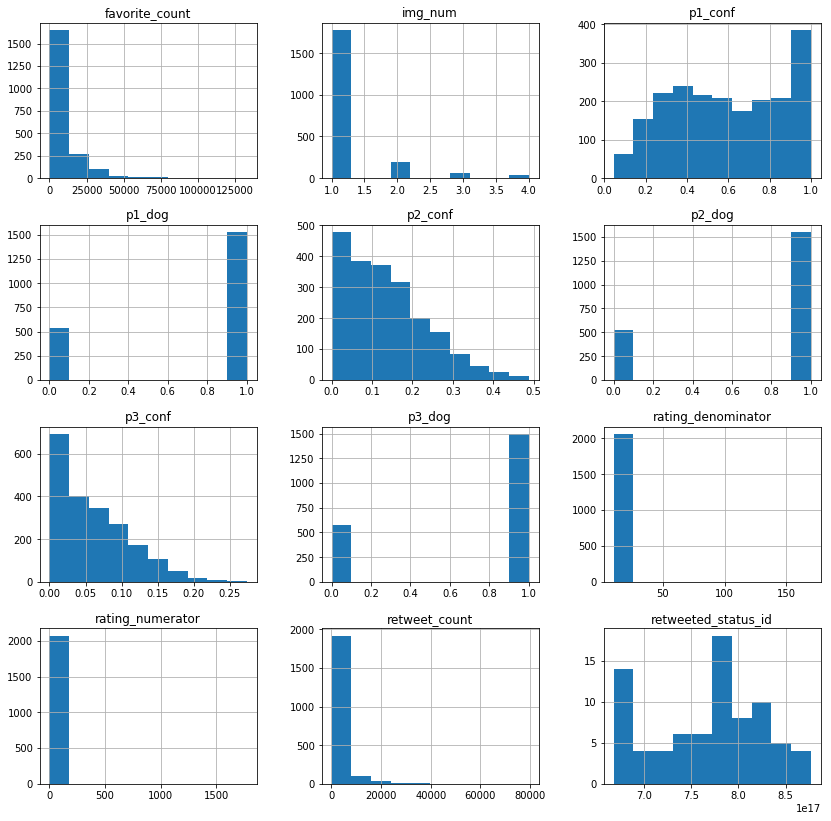

In [81]:
tw.hist(figsize=(14,14));

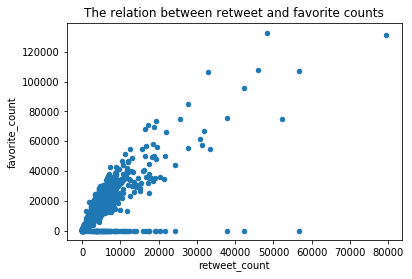

In [82]:
# Scatterplot of retweet and favorite counts
tw.plot.scatter(x='retweet_count', y='favorite_count')
plt.xlabel("retweet_count");
plt.ylabel("favorite_count");
plt.title("The relation between retweet and favorite counts");
plt.legend();

In [98]:
# doggo
tw.query ('dog_stage == "doggo"').shape[0]

67

In [99]:
# floofer
tw.query ('dog_stage == "floofer"').shape[0]

7

In [100]:
# pupper
tw.query ('dog_stage == "pupper"').shape[0]

210

In [101]:
# puppo
tw.query ('dog_stage == "puppo"').shape[0]

23

####  Observation
1. There are positive relationship between retweet_count and favorite_count.
2. The dog type pupper is the most popular (210) than doggo (67), puppo (23), and floofer (7), where the last is the least popular.